In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [483]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [492]:
y_pred = [0.1, 0.0, 0.2, 0.1]
y_true = [0.1, 0.1, 0.1, 0.1]
mean_absolute_percentage_error(y_true, y_pred)

50.0

### Data preprocessing

In [493]:
df_regression_q1 = pd.read_csv('regressao_Q2.csv')

In [457]:
X = df_regression_q1.drop('target', axis=1)
y = df_regression_q1['target']

In [494]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVR

#model = ElasticNet(alpha=1.0, l1_ratio=0.01)
model = SVR(kernel='linear', C=0.001)
scores = cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)

In [496]:
scores

{'fit_time': array([0.17599654, 0.17799783, 0.17099905, 0.18199611, 0.16999841]),
 'score_time': array([0.02099919, 0.01899815, 0.0220046 , 0.02200294, 0.0219996 ]),
 'test_score': array([-19860.61560787, -19547.28782342, -19891.89261424, -20551.36675078,
        -21188.23806937]),
 'train_score': array([-20285.36934025, -20358.17840393, -20277.25177382, -20114.15880567,
        -19960.22299644])}

In [497]:
scores_train = abs(scores['train_score'])
scores_test = abs(scores['test_score'])
print('train: ', np.mean(scores_train))
print('test: ', np.mean(scores_test))

train:  20199.03626401975
test:  20207.880173137346


In [293]:
df_regression_q1.shape

(2500, 13)

In [294]:
df_regression_q1.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,1.92864,1.48414,0.86814,-0.67666,-0.28747,-1.45108,-0.73662,0.03134,-0.53872,1.30562,0.11557,-0.30478,127.682465
1,0.22185,-0.55320,-0.29845,0.65870,-0.30132,1.49319,-0.43096,0.33835,-0.30827,1.25765,1.88584,-0.57726,50.022972
2,-0.02183,0.13602,-0.37426,-1.29096,0.71912,1.95088,1.99309,-1.24197,-2.15377,-2.01455,-0.84625,0.29845,-24.364369
3,0.86528,1.36937,1.27999,1.18124,-0.72465,-0.02175,0.40340,-0.28272,-0.44390,0.84051,0.03326,-0.98550,96.415408
4,1.41333,-0.02920,-0.67228,1.76116,-1.12178,0.18002,0.48476,-0.76394,-0.16421,-2.42048,0.79727,-0.44033,157.407129


### PCA

In [134]:
from sklearn.decomposition import PCA

X = df_regression_q1.drop('target', axis=1)
y = df_regression_q1['target']

pca = PCA(n_components=10)
pca_result = pca.fit_transform(X)

In [135]:
pca.explained_variance_ratio_.sum()

1.0

In [1224]:
df_regression_q1 = pd.concat([pd.DataFrame(pca_result), y], axis=1)

### Remove outliers

In [174]:
for i in df_regression_q1.columns:
    Q1 = df_regression_q1[i].quantile(0.25)
    Q3 = df_regression_q1[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df_regression_q1[i] >= Q1 - 1.5 * IQR) & (df_regression_q1[i] <= Q3 + 1.5 *IQR)
    df_regression_q1 = df_regression_q1.loc[filter]

<AxesSubplot:>

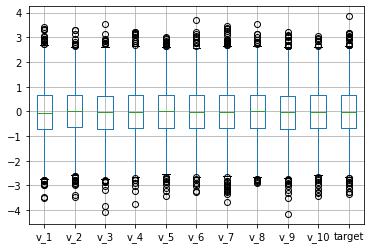

In [337]:
df_regression_q1.boxplot()

In [178]:
df_regression_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     3000 non-null   float64
 1   v_2     3000 non-null   float64
 2   v_3     3000 non-null   float64
 3   v_4     3000 non-null   float64
 4   v_5     3000 non-null   float64
 5   v_6     3000 non-null   float64
 6   v_7     3000 non-null   float64
 7   v_8     3000 non-null   float64
 8   v_9     3000 non-null   float64
 9   v_10    3000 non-null   float64
 10  target  3000 non-null   float64
dtypes: float64(11)
memory usage: 257.9 KB


In [179]:
df_regression_q1.isna().sum()

v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
target    0
dtype: int64

### StandardScaler - all features and target

In [316]:
mean = np.mean(df_regression_q1['target'])
std = np.std(df_regression_q1['target'])

In [317]:
scaler = StandardScaler()
df_regression_q1 = pd.DataFrame(scaler.fit_transform(df_regression_q1))

In [318]:
X = df_regression_q1.drop(12, axis=1)
y = df_regression_q1[12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### StandardScaler - all features

In [338]:
X = df_regression_q1.drop('target', axis=1)
y = df_regression_q1['target']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [340]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [341]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [342]:
lr.score(X_train, y_train)

0.9999997400731822

In [343]:
lr.coef_

array([ 2.39793130e-05, -7.85319306e-06,  3.63286368e-07, -7.68114881e-06,
        4.79971701e-01,  8.85586951e-01, -2.28997739e-05, -3.24997205e-06,
       -1.35885030e-06,  3.62568963e-06])

In [344]:
lr.intercept_

0.003848529617311857

### Predict - StandardScaler in features

In [345]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.0004195013628294197
2.769496663934995e-07
0.0005262600748617546
0.33451804291409737
0.9999997217476695


### Predict - StandardScaler in target

In [447]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [448]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.00041950136282938076
2.769496663935149e-07
0.0005262600748617692
0.334518042914386
0.9999997217476695


### Ridge Regression

In [485]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.5).fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [486]:
ridge.score(X_train, y_train)

0.9999996262353433

In [487]:
ridge.coef_

array([ 6.93445694e-01,  1.27748630e-06,  6.14662152e-07,  4.29906191e-01,
        6.04340310e-01, -6.01217599e-06,  3.02570374e-06, -3.32672275e-05,
       -2.42831697e-05,  4.13448177e-05,  4.99691824e-02,  2.14259672e-05])

In [488]:
ridge.intercept_

1.4025267411267583e-05

### Predict - StandardScaler in features

In [480]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.06993388831453251
0.007780421027077596
0.08820669491074698
0.1872931917180744
0.9999995957122552


### Predict - StandardScaler in target

In [489]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [490]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.0699001372136197
0.007773756499794698
0.08816890891802336
0.18720204896286646
0.9999995960585586


### SGDRegressor

In [24]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train)
y_pred = sgd.predict(X_test)

In [25]:
sgd.score(X_train, y_train)

0.9999996985510006

In [26]:
sgd.coef_

array([ 6.93578646e-01,  8.92574080e-06,  8.49712306e-06,  4.29983363e-01,
        6.04447979e-01, -1.19994811e-05,  4.50361396e-06, -4.06992831e-05,
       -1.17002102e-05,  2.93757514e-05,  4.99822841e-02,  2.16774490e-05])

In [27]:
sgd.intercept_

array([7.29723346e-06])

### Predict - StandardScaler in features

In [13]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.06285050647345286
0.0062587672707245506
0.07911237116105516
0.18326401324903904
0.9999996747807224


### Predict - StandardScaler in target

In [28]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [29]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.06287414582190282
0.006280264085184941
0.07924811723432262
0.18323885849402272
0.9999996736637008


### SVR

In [130]:
from sklearn.svm import SVR

svr = SVR(C=1.0, epsilon=0.2, gamma='scale', kernel='linear').fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [131]:
svr.score(X_train, y_train)

0.9942912533166385

In [132]:
svr.coef_

array([[ 0.64452868,  0.00734342, -0.0006472 ,  0.40468675,  0.56115347,
        -0.0061699 ,  0.01537783,  0.01801182, -0.00480502,  0.02319648,
         0.05431791,  0.00206031]])

In [133]:
svr.intercept_

array([0.00148209])

### Predict - StandardScaler in features

In [125]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.08456994781302175
0.011347705604745451
0.10652561008858598
0.19618361303723103
0.9999994103483227


### Predict - StandardScaler in target

In [134]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [135]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

9.099595770348618
126.36226830746125
11.241097291077114
16.200732700348542
0.9934339393313143


### Tree Regressor

In [156]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [161]:
tree.score(X_train, y_train)

0.9999999994200278

### Predict - StandardScaler in features

In [151]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

33.55451219258399
1995.3620842720184
44.669475979375655
76.41899197330122
0.8963166087724342


### Predict - StandardScaler in target

In [158]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [159]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

33.244415045490165
1999.8513794385524
44.71969789073437
81.94420733771072
0.8960833351471826


### Gaussian Process Regressor

In [175]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(X_train, y_train)
y_pred = gpr.predict(X_test)

In [176]:
gpr.score(X_train, y_train)

0.9999993749708131

### Predict - StandardScaler in features

In [177]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.09018038129143263
0.012814162401225944
0.1131996572487123
0.20022452985823738
0.9999993341480106


### Predict - StandardScaler in target

In [168]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [170]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.06220467016816086
0.006041681404915387
0.07772825358204948
0.1822866488503795
0.9999996860609802


### KNeighbors Regressor

In [239]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [240]:
knn.score(X_train, y_train)

0.8409860421567419

### Predict - StandardScaler in features

In [231]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

50.6100409956679
4177.33712017231
64.63232256520193
87.82858624424755
0.7829363991957996


### Predict - StandardScaler in target

In [241]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [242]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

50.998014726425325
4285.902075819735
65.46680132570809
84.99623138844761
0.7772951259358128


In [246]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(1 - knn.score(X_test, y_test))

Text(0, 0.5, 'Mean Error')

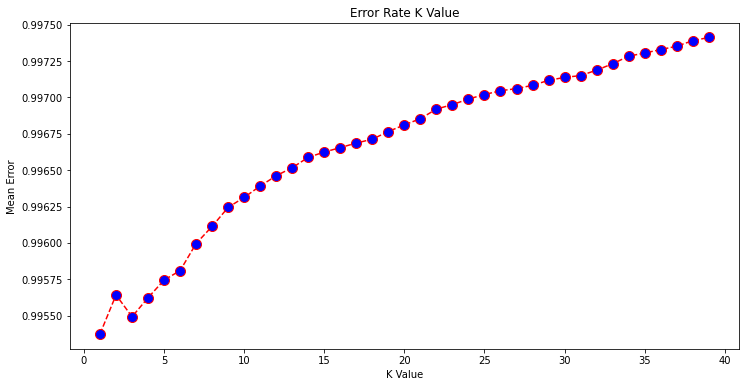

In [247]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Random Forest Regressor

In [291]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [292]:
rf.score(X_train, y_train)

0.9960023301393072

### Predict - StandardScaler in features

In [293]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

15.364660439056385
586.5146866978888
24.218065296342083
29.051190930209174
0.9695234102116375


### Predict - StandardScaler in target

In [254]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [255]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

71.42622160008995
8391.436993643576
91.60478695812559
123.15517764749218
0.5639625250818362


### MLP Regressor

In [346]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=100, max_iter=1000, random_state=42).fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [347]:
mlp.score(X_train, y_train)

0.996182629053898

### Predict - StandardScaler in features

In [348]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.054141046290293066
0.004767644152312493
0.06904812924556678
66.08264863258529
0.9952099306943519


### Predict - StandardScaler in target

In [324]:
y_pred = (y_pred * std) + mean
y_test = (y_test * std) + mean

In [325]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

8.437894555756243
115.49290336602355
10.746762459737516
21.272700756284628
0.9939987353783584
